<a href="https://colab.research.google.com/github/Ehtisham1053/Natural-Language-Processing/blob/main/Tf_Idf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TF-IDF (Term Frequency-Inverse Document Frequency) in NLP
TF-IDF is a numerical statistic that reflects the importance of a word in a document relative to a collection of documents (corpus). It is commonly used in text analysis and Natural Language Processing (NLP) for text representation.

------------------------------------------------------------------
------------------------------------------------------------------
------------------------------------------------------------------

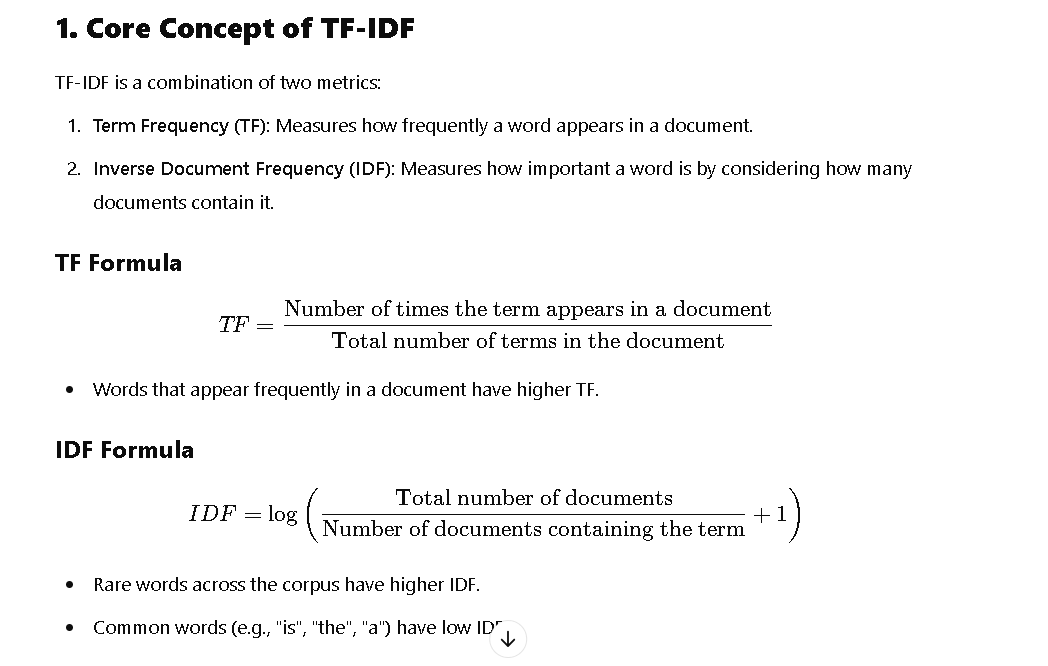

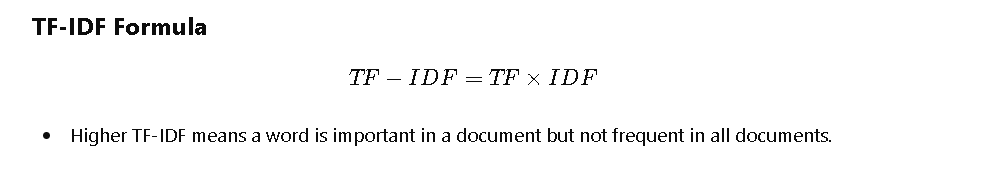

In [5]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

In [2]:
data = {'Text': [
    'Natural language processing is amazing',
    'Language models are powerful in NLP',
    'Processing text data is a crucial step in NLP',
    'NLP helps machines understand human language'
]}

df = pd.DataFrame(data)
df


,Text
0,Natural language processing is amazing
1,Language models are powerful in NLP
2,Processing text data is a crucial step in NLP
3,NLP helps machines understand human language


In [3]:
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(df['Text'])

# Convert to DataFrame for better visualization
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())



print("\nTF-IDF Representation:")
tfidf_df



TF-IDF Representation:


,amazing,are,crucial,data,helps,human,in,is,language,machines,models,natural,nlp,powerful,processing,step,text,understand
0,0.523381,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.412640,0.334067,0.000000,0.000000,0.523381,0.000000,0.000000,0.412640,0.000000,0.000000,0.000000
1,0.000000,0.474771,0.000000,0.000000,0.000000,0.000000,0.374315,0.000000,0.303040,0.000000,0.474771,0.000000,0.303040,0.474771,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.399292,0.399292,0.000000,0.000000,0.314806,0.314806,0.000000,0.000000,0.000000,0.000000,0.254863,0.000000,0.314806,0.399292,0.399292,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.455732,0.455732,0.000000,0.000000,0.290888,0.455732,0.000000,0.000000,0.290888,0.000000,0.000000,0.000000,0.000000,0.455732


In [7]:
print("\nIDF Values:")
idf_values = vectorizer.idf_
idf_df = pd.DataFrame({'Feature': vectorizer.get_feature_names_out(), 'IDF': idf_values})
idf_df



IDF Values:


,Feature,IDF
0,amazing,1.916291
1,are,1.916291
2,crucial,1.916291
3,data,1.916291
4,helps,1.916291
5,human,1.916291
6,in,1.510826
7,is,1.510826
8,language,1.223144
9,machines,1.916291


In [6]:
def get_top_tfidf_words(tfidf_matrix, feature_names, top_n=3):
    important_words = []

    for row in tfidf_matrix:
        top_indices = np.argsort(row)[::-1][:top_n]  # Get indices of top N words
        top_words = [(feature_names[i], row[i]) for i in top_indices]
        important_words.append(top_words)

    return important_words

# Get feature names (words)
feature_names = vectorizer.get_feature_names_out()
tfidf_array = X_tfidf.toarray()

# Get top 3 important words per document
important_words = get_top_tfidf_words(tfidf_array, feature_names, top_n=3)

# Display results
for i, words in enumerate(important_words):
    print(f"\nTop words for Document {i+1}:")
    for word, score in words:
        print(f"{word}: {score:.4f}")



Top words for Document 1:
amazing: 0.5234
natural: 0.5234
is: 0.4126

Top words for Document 2:
models: 0.4748
powerful: 0.4748
are: 0.4748

Top words for Document 3:
text: 0.3993
step: 0.3993
data: 0.3993

Top words for Document 4:
understand: 0.4557
machines: 0.4557
human: 0.4557


##✅ Advantages
* Reduces the impact of common words (e.g., "is", "the") by assigning lower weights.

* Highlights important words unique to a document.

* Improves document similarity and search by focusing on meaningful words.

##❌ Disadvantages
* Ignores context (e.g., "New York" is treated as two separate words).

* Computationally expensive for large datasets.

* Can be affected by outliers (rare words might get too much importance).

------------------------------------------------
------------------------------------------------
------------------------------------------------
------------------------------------------------
## When to Use TF-IDF?
* Text Classification: Extracts important words for classification.

* Search Engines: Ranks documents based on relevant words.

* Keyword Extraction: Identifies key terms in a document.

* Plagiarism Detection: Compares document similarity.

* TF-IDF = TF × IDF (Measures importance of a word).

* Higher TF-IDF → Word is important.

* Lower TF-IDF → Word is common across documents.

* Used in search engines, text classification, and keyword extraction.

## Real world application
###✅ Search Engines (Google, Bing, Yahoo)

TF-IDF helps rank pages based on keyword relevance.

Words that frequently appear across many pages (e.g., "the", "is") are downweighted, while rare words are given higher importance.

###✅ Document Similarity & Plagiarism Detection

TF-IDF scores help compare documents for similarity.

###✅ Keyword Extraction for SEO (Search Engine Optimization)

Important words in an article are extracted using TF-IDF.

###✅ Chatbots & Virtual Assistants

TF-IDF helps chatbots understand important words in a conversation.